

**Assignment 9**: Adaboost Regression




# Imports

In [7]:
#importing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor



1. Load the concrete compressive strength dataset from UCI:  
https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength. Check the dataset to remove duplicate entries and handle missing feature values (through imputation or removal depending on the number of samples having missing feature values). Split the dataset into training, validation and test sets (70%-15%-15%). (2 marks)

In [8]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
df = pd.read_excel(url)

# Check for duplicate entries
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate entries
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", len(df))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())




Number of duplicate rows: 25
Number of rows after removing duplicates: 1005

Missing values per column:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [ ]:
#No missing values so no need for imputation

In [9]:
# renaming columns for convinience cause names are too large
df.columns = ['cement', 'bfs', 'flyash', 'Water', 'sp', 'ca', 'fa', 'age', 'ccs']

In [10]:
# Split the dataset
X = df.drop(columns=['ccs'])
y = df['ccs']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 703
Validation set size: 151
Test set size: 151


2. Implement an Adaboost regressor (Adaboost.R2 algorithm from scratch as follows): (8 marks) <br>
      a. Use decision tree stumps as individual regressors (students are permitted to use DecisionTreeRegressor from scikit-learn with max_depth=1, i.e. they need not implement the decision tree regressor from scratch).

      b. Implement the Steps 1-3 of the Adaboost.R2 algorithm for regression as given in the attached pdf.

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class AdaBoostR2():
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.myModels = []

    def fit(self, X, y):
        N = y.shape[0]
        w = np.ones(N)/N
        for itr in range(self.n_estimators):
            models = DecisionTreeRegressor(max_depth=1)
            models.fit(X, y, sample_weight=w)
            y_preds = models.predict(X)
            err = np.abs(y_preds - y)
            normalized_err = err / np.max(err)
            em = np.dot(normalized_err, w)
            em += 1e-10
            if em > 0.5:
                print(f"Error >= 0.5")
                break
            B = em / (1 - em)
            alpha =  np.log(1 / B)
            w *= B **  ( 1 - normalized_err)
            w /= np.sum(w)

            self.myModels.append((alpha, models))

    def predict(self, X):
        if not self.myModels:
            raise ValueError("Model not fitted yet.")
        total_y = sum(alpha * model.predict(X) for alpha, model in self.myModels)
        total_alpha = sum(alpha for alpha,models in self.myModels)
        total_y /= total_alpha
        return total_y


3. Plot the R^2 score on the validation set for different values of the number of weak learners (M in the given algorithm). Accordingly, choose a suitable value of M. M = [5, 10, 20, 40, 60, 80, 100, 150, 200, 500, 1000, 5000, 10000]. (2 marks)

Error >= 0.5
Error >= 0.5
Error >= 0.5
Error >= 0.5
Error >= 0.5


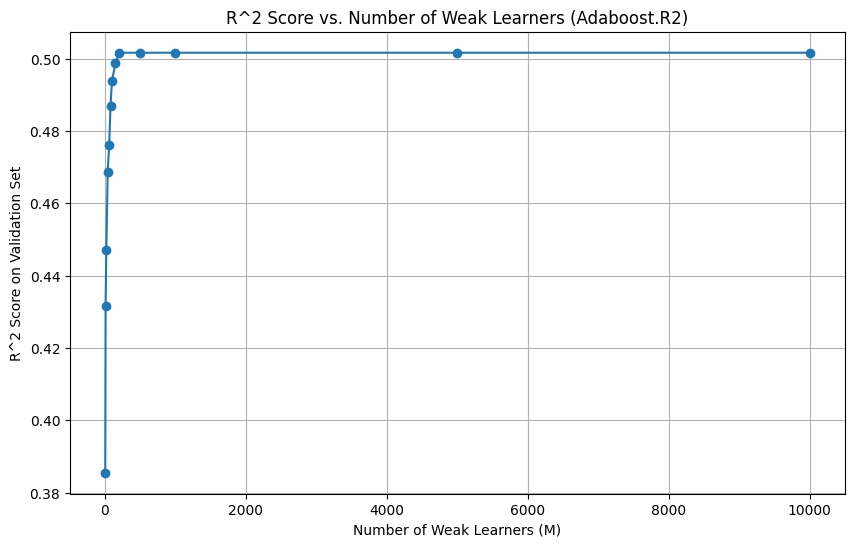

In [36]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the list of M values
M_values = [5, 10, 20, 40, 60, 80, 100, 150, 200, 500, 1000, 5000, 10000]

# Initialize a list to store the R^2 scores
r2_scores = []
for m in M_values:
    adaboostr2 = AdaBoostR2(m)
    adaboostr2.fit(X_train, y_train)
    my_y_pred = adaboostr2.predict(X_val)  # Predict on the validation set
    r2 = r2_score(y_val, my_y_pred)
    r2_scores.append(r2)

# Plot the R^2 scores against the number of weak learners (M)
plt.figure(figsize=(10, 6))
plt.plot(M_values, r2_scores, marker='o')
plt.xlabel('Number of Weak Learners (M)')
plt.ylabel('R^2 Score on Validation Set')
plt.title('R^2 Score vs. Number of Weak Learners (Adaboost.R2)')
plt.grid(True)
plt.show()

4. For the Adaboost.R2 algorithm designed with the best value of M that you selected in part 3, perform prediction on the test set. Report the R^2 score on the test set and show a scatter plot of the predictions vs. The ground truths.  (2 marks)




In [38]:
best_m_value = 200 # for splitting randonm state 42
adaboostr2 = AdaBoostR2(best_m_value)
adaboostr2.fit(X_train, y_train)
y_pred = adaboostr2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score on test set: {r2}")


Error >= 0.5
R^2 score on test set: 0.4638329638464779


5. Use scikit-learn's AdaboostRegressor to fit the training set by choosing  suitable values of the hyperparameters.( 3 marks)

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model_sklearn = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=best_m_value, random_state=42)
model_sklearn.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=200, random_state=42)

6. Perform prediction on the test set using scikit-learn's AdaboostRegressor trained as in part 5. Report the R^2 score and show the scatter plot of the predictions vs. Ground truths. (2 marks)

In [45]:
from sklearn.metrics import r2_score

y_pred = model_sklearn.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score on test set: {r2}")


R^2 score on test set: 0.4519357620393729


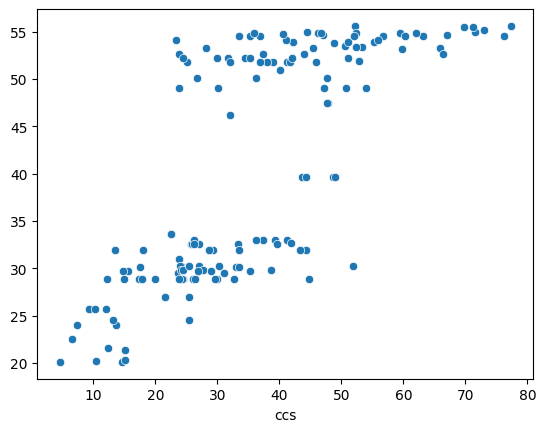

In [46]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
plt.show()


7. Compare the from scratch-implementation of Adaboost Regressor to that of scikit-learn.  (1 mark)


Error >= 0.5


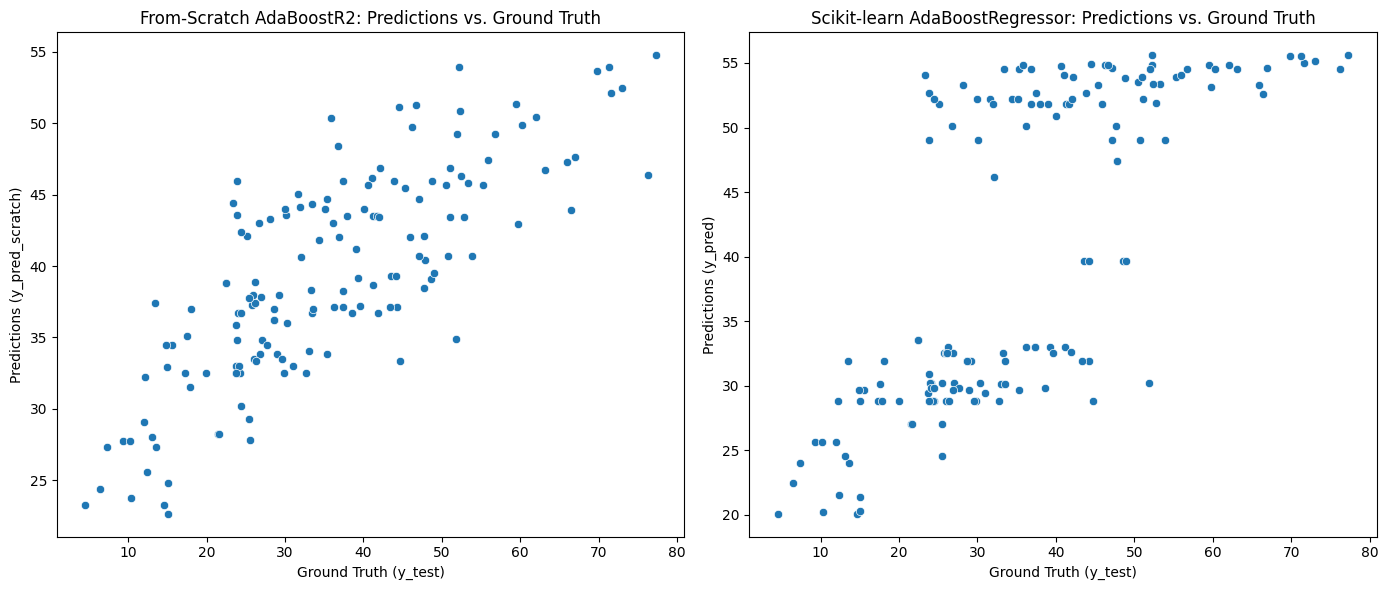

In [47]:

adaboostr2_scratch = AdaBoostR2(best_m_value)
adaboostr2_scratch.fit(X_train, y_train)
y_pred_scratch = adaboostr2_scratch.predict(X_test)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# from scratch ada boost
sns.scatterplot(x=y_test, y=y_pred_scratch, ax=axes[0])
axes[0].set_title('From-Scratch AdaBoostR2: Predictions vs. Ground Truth')
axes[0].set_xlabel('Ground Truth (y_test)')
axes[0].set_ylabel('Predictions (y_pred_scratch)')


#  Scikit-learn Implementation
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1])
axes[1].set_title('Scikit-learn AdaBoostRegressor: Predictions vs. Ground Truth')
axes[1].set_xlabel('Ground Truth (y_test)')
axes[1].set_ylabel('Predictions (y_pred)')

plt.tight_layout()
plt.show()

In [47]:
#r2 score is nearly same